## Assignmnent- Web Analytics
## Author: Chandni Sharma

### Objective: To build a predictive model, which shall decide whether the customer will buy or not, means the variable: Revenue shall be the Response Variable and others are the Predictor Variables.

#### Dataset: https://docs.google.com/spreadsheets/d/10nYTgTi9tPUP4qdnB6gWP3EXEM5kL8F8ksEZ01CV90o/edit#gid=899499476

##### The dataset consists of 10 numerical and 8 categorical attributes.
+ "Revenue": Class level. Possible values: False and True.
+ “Administrative”, “Administrative Duration”: Represent the Administrative pages visited by the visitor in that session and total time spent in each of this page category.
+ “Informational”, “Informational Duration”: Represent the Information related pages visited by the visitor in that session and total time spent in each of this page category.
+ “Product Related” and “Product Related Duration”: Represent the Product Related pages visited by the visitor in that session and total time spent in each of this page category.
+ “Bounce Rate” refers to the percentage of visitors who enter the site from that page and then leave without triggering any other requests to the analytics server during that session.
+ “Exit Rate” depicts the percentage of exits on a page.
+ “Page Value” feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
+ “Special Day” feature indicates the closeness of the site visiting time to a specific special day.
+ The dataset also includes some other features such as operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Upload the required dataset
onlineshopper_df=pd.read_csv(r"C:\Users\Maneesh\Downloads\online_shoppers_intention.csv - online_shoppers_intention.csv.csv")
print("Data Imported successfully")


Data Imported successfully


In [3]:
# Get the size of the dataset
onlineshopper_df.shape

(12330, 18)

In [4]:
# Get first 10 records from the dataset
onlineshopper_df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
# Get the descriptive statistics of the dataset
onlineshopper_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Check for Missing values
mv=onlineshopper_df.isnull().sum()
mv

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### Plotting the Percentage of customers have brought Revenue. ‘True’ means customer has bought the product and ‘False’ means customer did not buy the product.

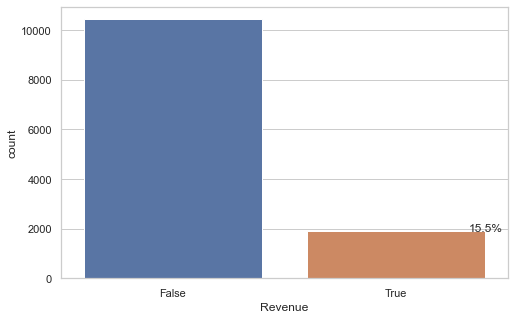

In [7]:
#Plotting the percentage of customers have brought revenue
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(onlineshopper_df))
ax = sns.countplot(x="Revenue", data=onlineshopper_df)
for p in ax.patches:
     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
x = p.get_x() + p.get_width()
y = p.get_height()
ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Distribution of VisitorType

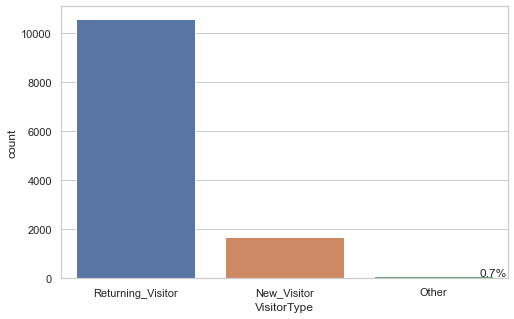

In [8]:
#Distribtution of visitor's type
onlineshopper_df['VisitorType'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(onlineshopper_df))
ax = sns.countplot(x="VisitorType", data=onlineshopper_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
x = p.get_x() + p.get_width()
y = p.get_height()
ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Percentage distribution of ‘VisitorType’ over the ‘Weekend’

Text(2.0, 22.57605914131362, '22.58%')

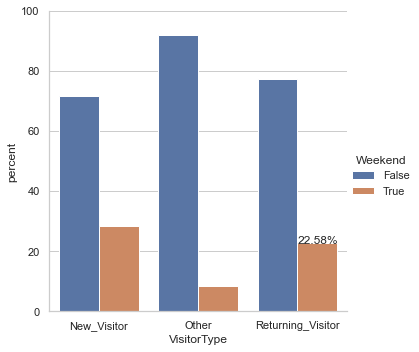

In [9]:
# Percentage distribution
x,y = 'VisitorType', 'Weekend'
df1 = onlineshopper_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
txt_x = p.get_x()
txt_y = p.get_height()
g.ax.text(txt_x,txt_y,txt)

###  Distribution of Revenue (Buy or Not) for different Traffic Types

Text(19.0, 25.252525252525253, '25.25%')

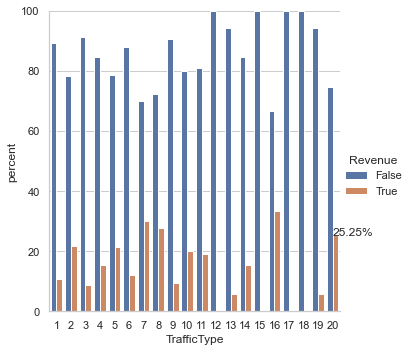

In [10]:
# Dsitribution of revenue
x='TrafficType'
y= 'Revenue'
df1 = onlineshopper_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
txt_x = p.get_x()
txt_y = p.get_height()
g.ax.text(txt_x,txt_y,txt)

### Distribution of Customers based on Different Traffic Type Codes

Text(0, 0.5, 'Count')

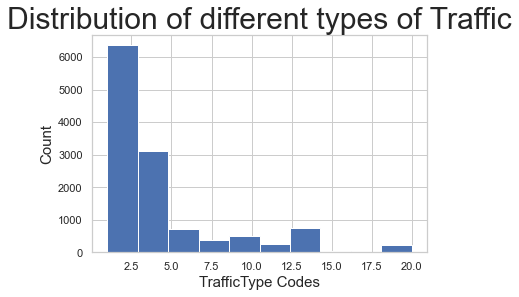

In [11]:
plt.hist(onlineshopper_df['TrafficType'])
plt.title('Distribution of different types of Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

###  Distribution of Customers based on Region Codes

Text(0, 0.5, 'Count')

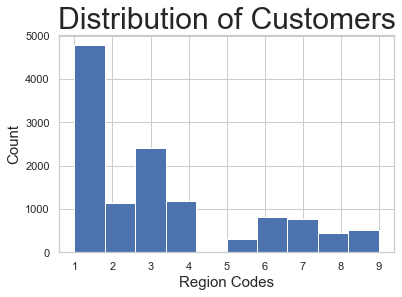

In [12]:
# Dsitribtuion of customers on region code
plt.hist(onlineshopper_df['Region'])
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Distribution of Customers over OperatingSystems

Text(0, 0.5, 'Count')

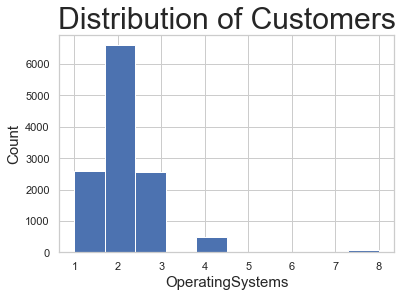

In [13]:
# Distribution of customers over operating system
plt.hist(onlineshopper_df['OperatingSystems'])
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('OperatingSystems', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Distribution of Customers over Months

Text(0, 0.5, 'Count')

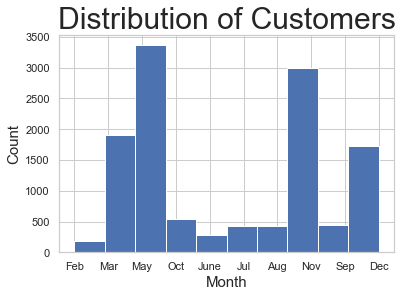

In [14]:
# Distribution of customers over months
plt.hist(onlineshopper_df['Month'])
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Distribution of Pagevalues over Revenue.  seaborn.stripplot draws a scatterplot where one variable is categorical.

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

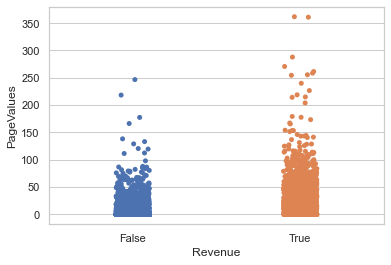

In [15]:
sns.stripplot(x= onlineshopper_df['Revenue'], y=onlineshopper_df['PageValues'])

### Distribution of Revenue over BounceRates

<AxesSubplot:xlabel='Revenue', ylabel='BounceRates'>

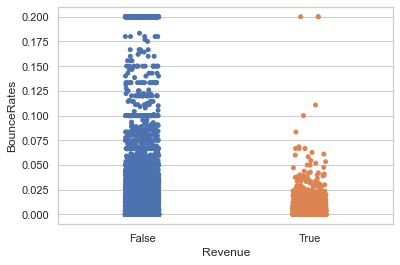

In [16]:
sns.stripplot(x= onlineshopper_df['Revenue'], y=onlineshopper_df['BounceRates'])

### Distribution of TrafficType over Revenue

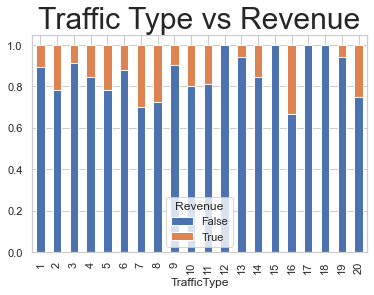

In [17]:
df = pd.crosstab(onlineshopper_df['TrafficType'], onlineshopper_df['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

### Distribution of TrafficType over Region

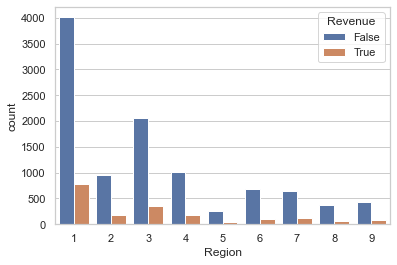

In [18]:
ax4=sns.countplot(x= onlineshopper_df['Region'],hue='Revenue', data=onlineshopper_df)


### Linear Regression plot between Administrative and Informational

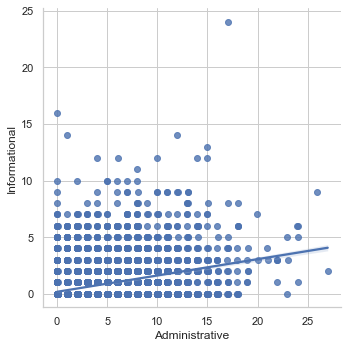

In [19]:
# Linear Regression plot between Administrative and Informational
sns.lmplot(x = 'Administrative', y = 'Informational', data = onlineshopper_df, x_jitter = 0.05)

## Multi-variate analysis

###  Month vs PageValues with respect to Revenue

Text(0.5, 1.0, 'Mon. vs PageValues with respect to Revenue')

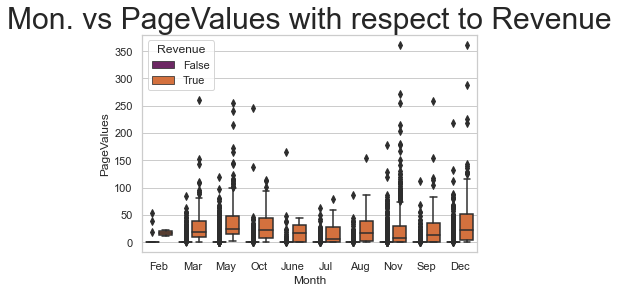

In [20]:
# Month vs PageValues with respect to Revenue
sns.boxplot(x = onlineshopper_df['Month'], y = onlineshopper_df['PageValues'], hue = onlineshopper_df['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues with respect to Revenue', fontsize = 30)

### Month vs bouncerates with respect to revenue

Text(0.5, 1.0, 'Mon. vs BounceRates with respect to Revenue')

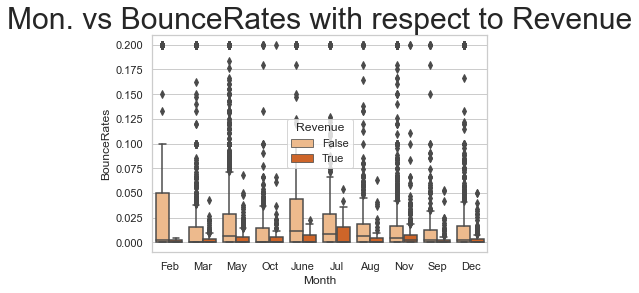

In [21]:
# month vs bouncerates with respect to revenue
sns.boxplot(x = onlineshopper_df['Month'], y = onlineshopper_df['BounceRates'], hue = onlineshopper_df['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates with respect to Revenue', fontsize = 30)

### Visitor type vs BounceRates with respect to revenue

Text(0.5, 1.0, 'Visitors vs BounceRates with respect to Revenue')

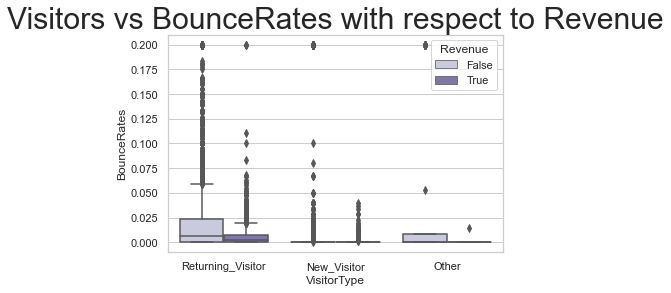

In [22]:
# visitor type vs BounceRates with respect to revenue
sns.boxplot(x = onlineshopper_df['VisitorType'], y = onlineshopper_df['BounceRates'], hue = onlineshopper_df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates with respect to Revenue', fontsize = 30)

### Visitor type vs ExitRates with respect to revenue

Text(0.5, 1.0, 'Visitors vs ExitRates with respect to Revenue')

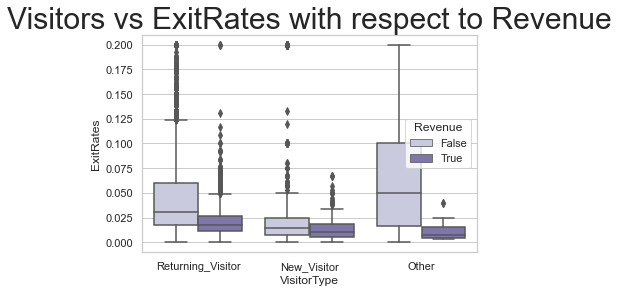

In [23]:
# visitor type vs ExitRates with respect to revenue
sns.boxplot(x = onlineshopper_df['VisitorType'], y = onlineshopper_df['ExitRates'], hue = onlineshopper_df['Revenue'], palette = 'Purples')
plt.title('Visitors vs ExitRates with respect to Revenue', fontsize = 30)

### Months vs ExitRates with respect to revenue

Text(0.5, 1.0, 'Month. vs ExitRates with respect to Revenue')

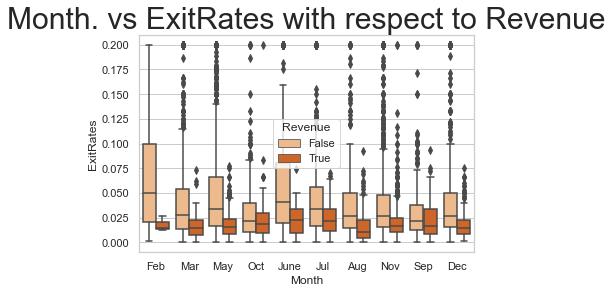

In [24]:
sns.boxplot(x = onlineshopper_df['Month'], y = onlineshopper_df['ExitRates'], hue = onlineshopper_df['Revenue'], palette = 'Oranges')
plt.title('Month. vs ExitRates with respect to Revenue', fontsize = 30)

In [25]:
onlineshopper_df.fillna(0, inplace = True)
# checking the no. of null values in data after imputing the missing value
onlineshopper_df.isnull().sum().sum()

0

#### The goal of cluster analysis in marketing is to accurately segment customers in order to achieve more effective customer marketing via personalization. A common cluster analysis method is a mathematical algorithm known as k-means cluster analysis, sometimes referred to as scientific segmentation.

+ Cluster of customers Administrative Duration vs Bounce Rate. We have considered columns 1 as Administrative Duration and column 6 as Bounce Rate. Total we have built 11 clusters.

+ WCSS: One measurement is Within Cluster Sum of Squares (WCSS), which measures the squared average distance of all the points within a cluster to the cluster centroid. To calculate WCSS, you first find the Euclidean distance (see figure below) between a given point and the centroid to which it is assigned.

+ Here, Elbow method is a graph between WCSS and No.of Clusters.

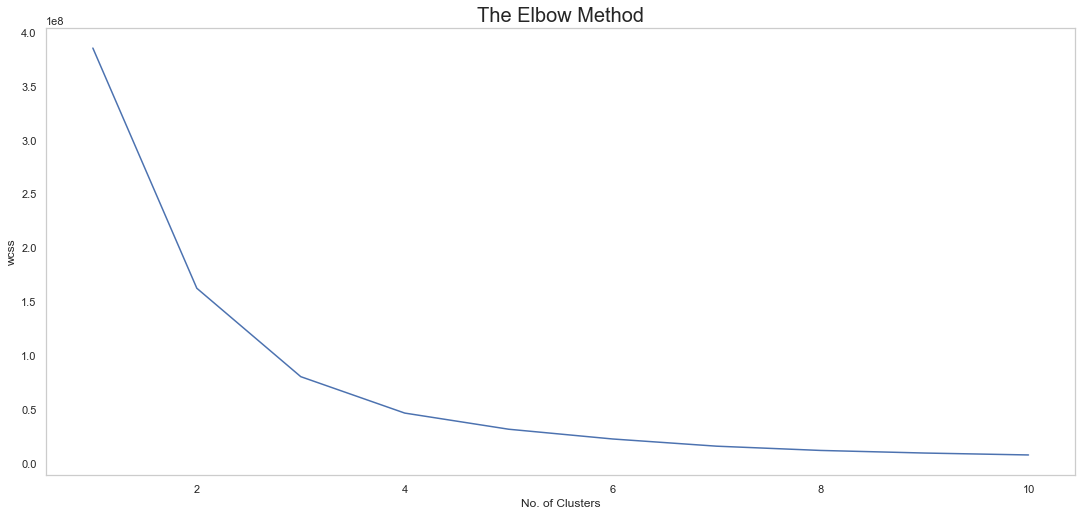

In [26]:
# preparing the dataset
x = onlineshopper_df.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### The maximum bend is at third index, that is the number of Optimal number of Clusters for Adminstrative Duration and Revenue is Three. plotting the clusters

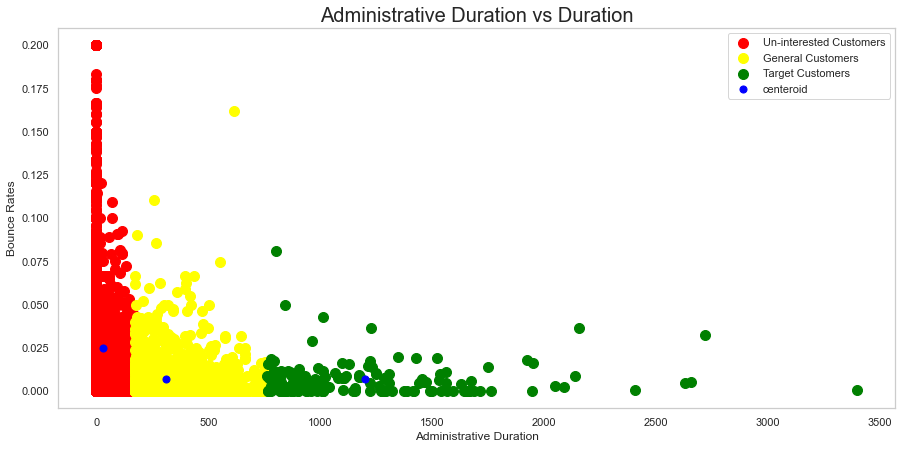

In [27]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

###  We have considered columns 3 as Informational Duration and column 6 as Bounce Rate.

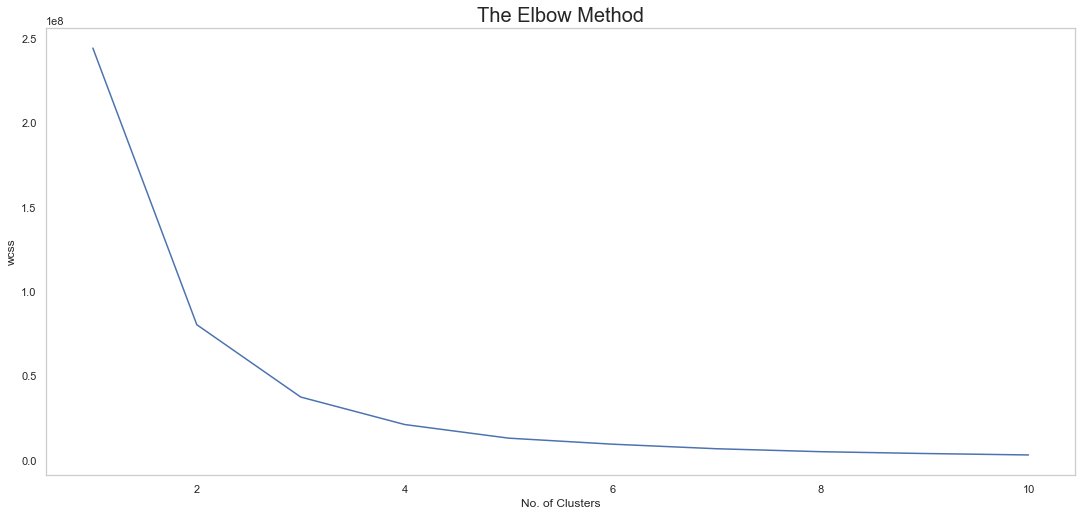

In [28]:
# informational duration vs Bounce Rates
x = onlineshopper_df.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = "full",
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### Here we have two clusters

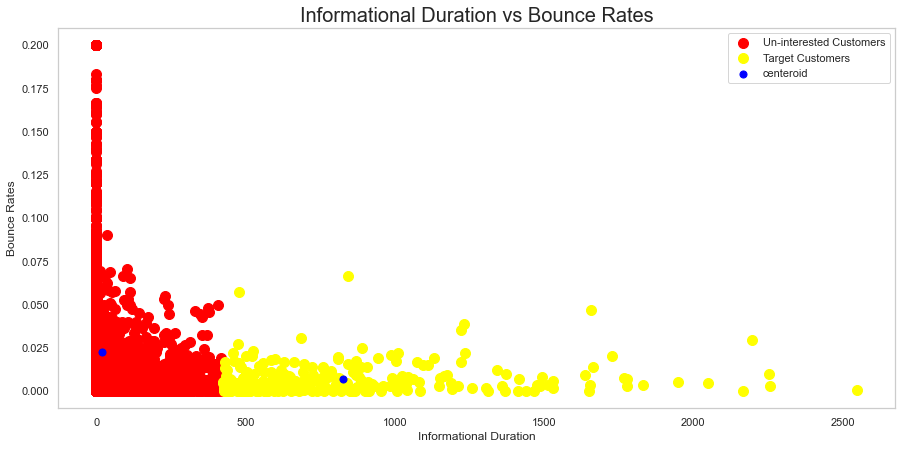

In [29]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### From where customer comes: Region vs Traffic Type

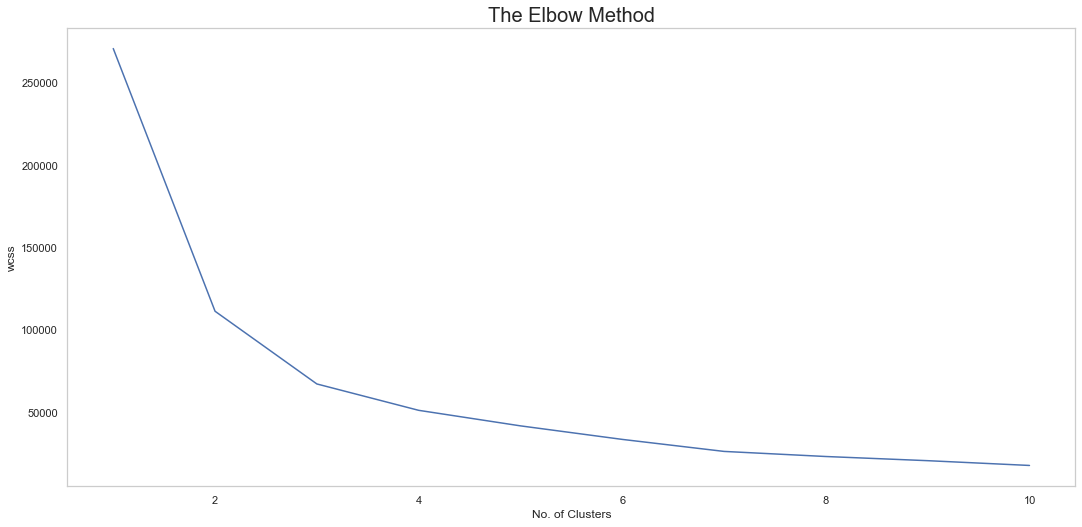

In [30]:
# Region vs Traffic Type
x = onlineshopper_df.iloc[:, [13, 14]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

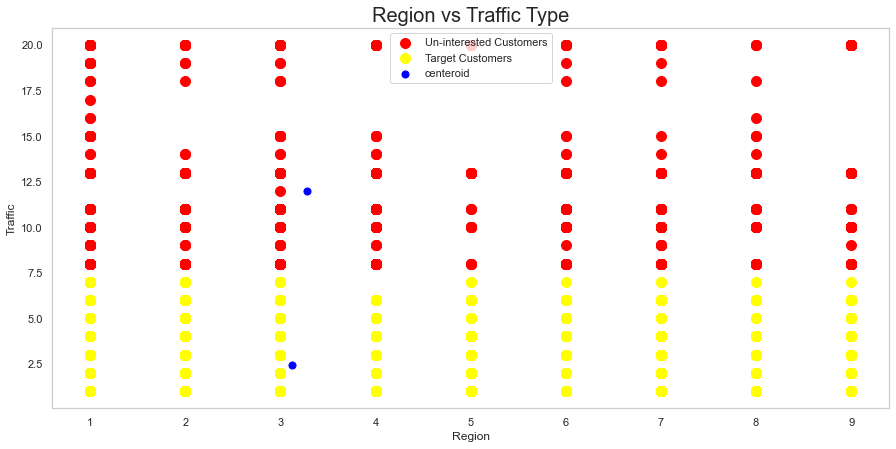

In [31]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Region vs Traffic Type', fontsize = 20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()
plt.show()

### Data Preprocessing to build Random Forest classifier and Logistic Regression. Here, we want to predict whether the customer will buy or not. So, we have used binary classifier.

In [32]:
# one hot encoding 

data1 = pd.get_dummies(onlineshopper_df)

data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
onlineshopper_df['Revenue'] = le.fit_transform(onlineshopper_df['Revenue'])
onlineshopper_df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [34]:
# getting dependent and independent variables

x=data1
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = data1['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


### Splitting the data between train and test sets

In [35]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


### RandomForest classifier model Building

In [36]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9998841385702699
Testing Accuracy : 0.8918626655852934


### Model accuracy is 89%

### Confusion Matrix

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      3077
        True       0.74      0.55      0.63       622

    accuracy                           0.89      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.88      0.89      0.89      3699



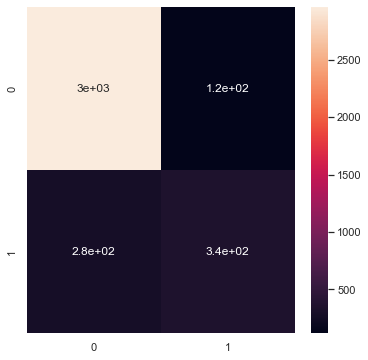

In [37]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

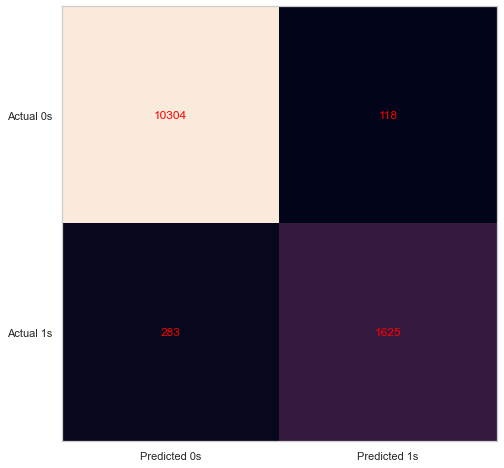

In [38]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Plotting the ROC curve for Random Forest

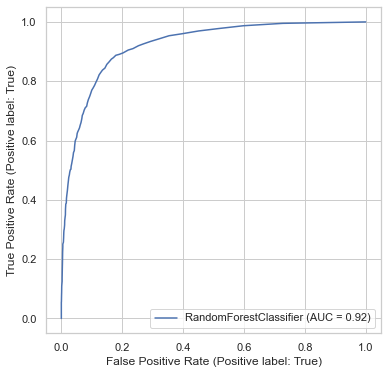

In [39]:
from sklearn.metrics import plot_roc_curve
rf_disp = plot_roc_curve(model, x_test, y_test)
plt.show()

### Saving the predictions of of Random Forest model into a dataframe, which can later be written in a .csv file, so that we can know from which customer we will get the revenue.

In [40]:
df=pd.DataFrame(y_pred,columns=["Revenue"])
df

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
3694,False
3695,True
3696,False
3697,False


### Building Logistic Regression model

In [41]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test) 

### Printing Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[2959  118]
 [ 282  340]]


### Plotting Confusion Matrix

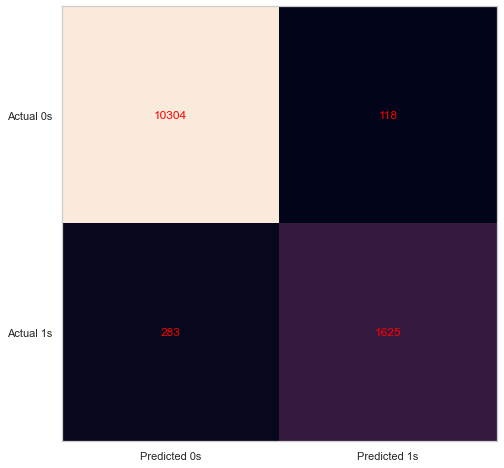

In [43]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Printing the Classification Report Accuracy of Logistic Regression is 87%

In [44]:
# classification report
cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3077
        True       0.76      0.38      0.50       622

    accuracy                           0.88      3699
   macro avg       0.82      0.68      0.72      3699
weighted avg       0.86      0.88      0.86      3699



### Plotting ROC curve for Logistic Regression

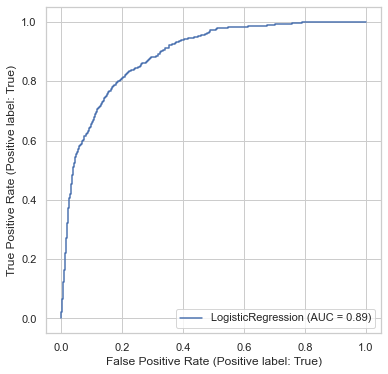

In [45]:
from sklearn.metrics import plot_roc_curve
lr_disp = plot_roc_curve(model1, x_test, y_test)
plt.show()

### Saving the predictions of of Logistic Regression model into a dataframe

In [46]:
df1 = pd.DataFrame(y_pred1, columns=["Revenue"])
df1

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
3694,False
3695,True
3696,False
3697,False


### Plotting ROC curve for both Random Forest and Logistic Regression

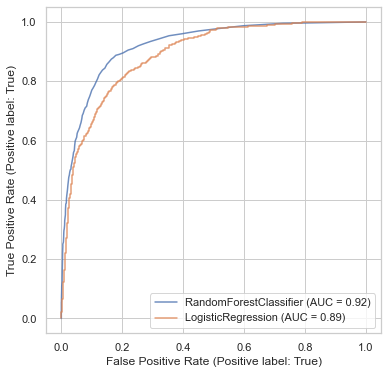

In [47]:
ax = plt.gca()
rf_disp = plot_roc_curve(model, x_test, y_test, ax=ax, alpha=0.8)
lr_disp.plot(ax=ax, alpha=0.8)
plt.show()

## Conclusion

####  In this case study, we performed Data Visualizations, made clusters based on customer behaviors, built two predictive models: 
+ Random Forest classifier and 
+ Logistic classifier
+ Compared performance of both the models using Confusion Matrix and ROC curve and 
+ Also wrote the predictions from both the models into respective data-frames, so that the business decision makers can know the exact customers who will generate the revenue and who will not, by writing those prediction outputs into csv files.